# Visualizações dos Resultados - Projeto de Ciência de Dados


Este notebook reúne as visualizações utilizadas na seção **5.9 Visualização dos Resultados**, incluindo:
- Comparação das métricas dos modelos (Linear Regression e Random Forest)
- Dispersão entre valores reais e previstos
- Visualização da importância das variáveis
- Análises segmentadas por grupos de sensibilidade (Alta, Média, Baixa, Todas)


In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [18]:

caminhos = {
    "Alta": "/Users/mariaisabel/Documents/PUC/5°Periodo/Projeto CD/ENG4040/Divisao/planilha_alta.csv",
    "Média": "/Users/mariaisabel/Documents/PUC/5°Periodo/Projeto CD/ENG4040/Divisao/planilha_media.csv",
    "Baixa": "/Users/mariaisabel/Documents/PUC/5°Periodo/Projeto CD/ENG4040/Divisao/planilha_baixa.csv",
    "Todas": "/Users/mariaisabel/Documents/PUC/5°Periodo/Projeto CD/ENG4040/Clustering/planilha/planilha_unificada_clusterizado.csv"
}

features = ["AREA_DESMATADA_KM2", "FRP", "RISCOFOGO", "PRECIPITACAO", "DIASEMCHUVA", "pm2.5_atm"]
target = "OBITOS"


In [19]:

def carregar_e_treinar(path, nome_grupo):
    df = pd.read_csv(path)
    df[target] = df[target].replace("-", np.nan)
    for col in features + [target]:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = df[col].fillna(df[col].median())

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    modelos = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42)
    }

    resultados = []
    for nome_modelo, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        resultados.append({"Modelo": nome_modelo, "Grupo": nome_grupo, "RMSE": rmse, "R2": r2})

        # Gráfico de dispersão
        plt.figure(figsize=(6, 4))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.title(f"Dispersão: {nome_modelo} - {nome_grupo}")
        plt.xlabel("Óbitos Reais")
        plt.ylabel("Óbitos Previstos")
        plt.tight_layout()
        plt.show()

    return resultados


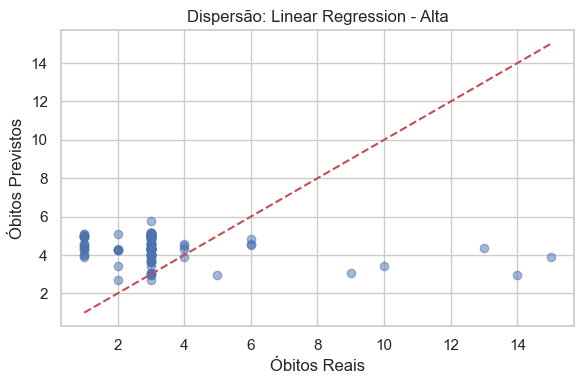

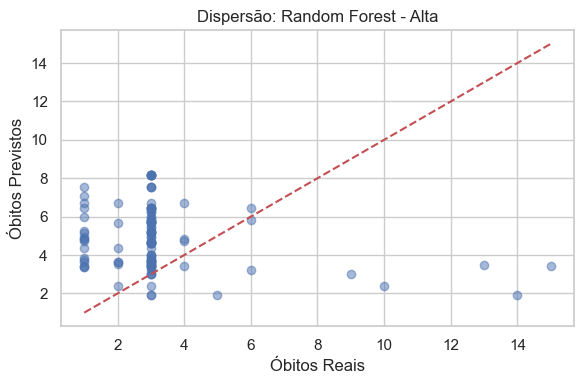

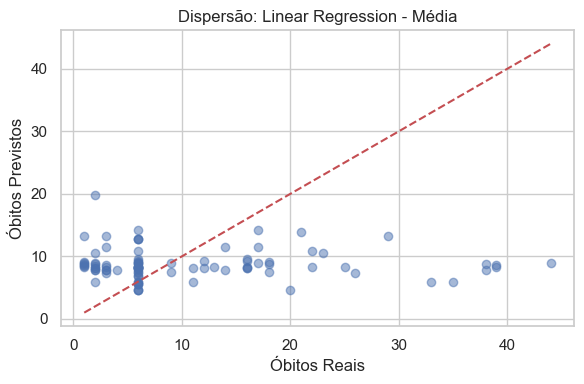

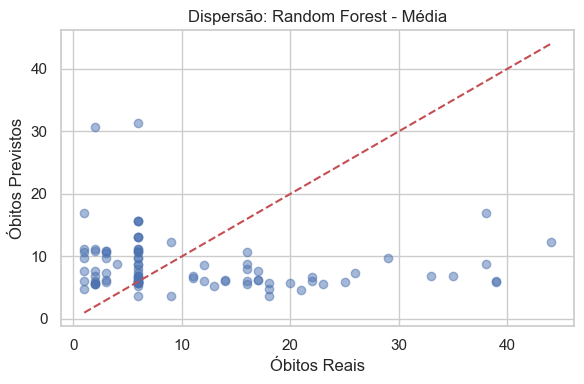

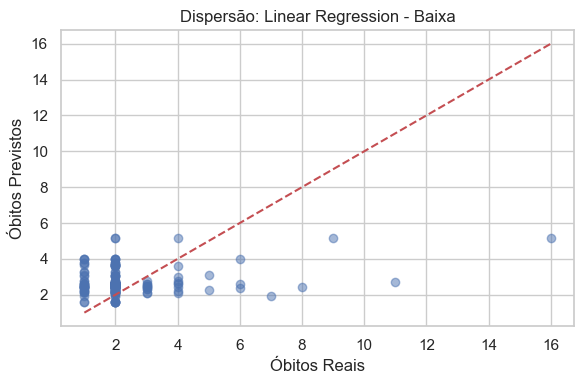

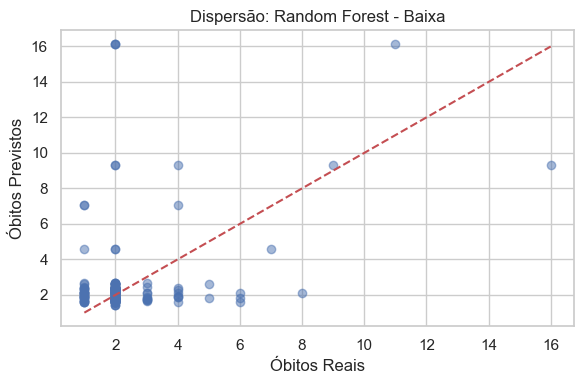

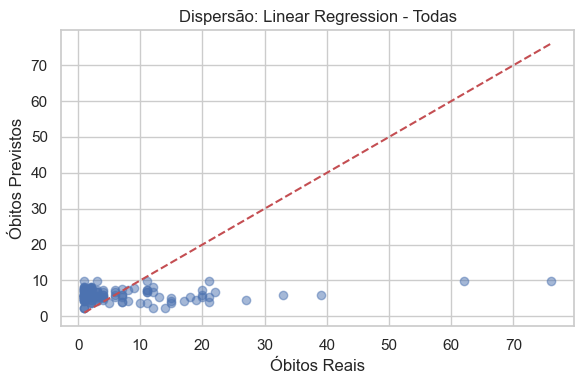

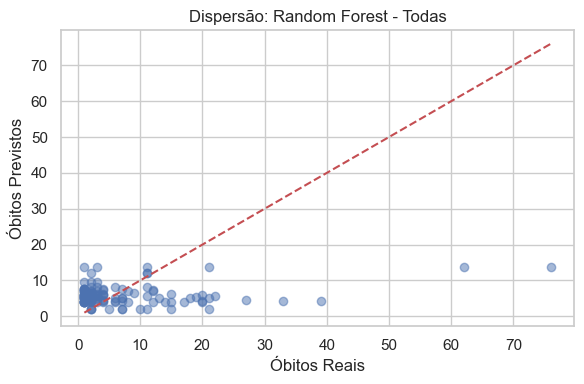

In [20]:

todos_resultados = []
for grupo, caminho in caminhos.items():
    resultados = carregar_e_treinar(caminho, grupo)
    todos_resultados.extend(resultados)

df_resultados = pd.DataFrame(todos_resultados)



📊 Grupo: Alta


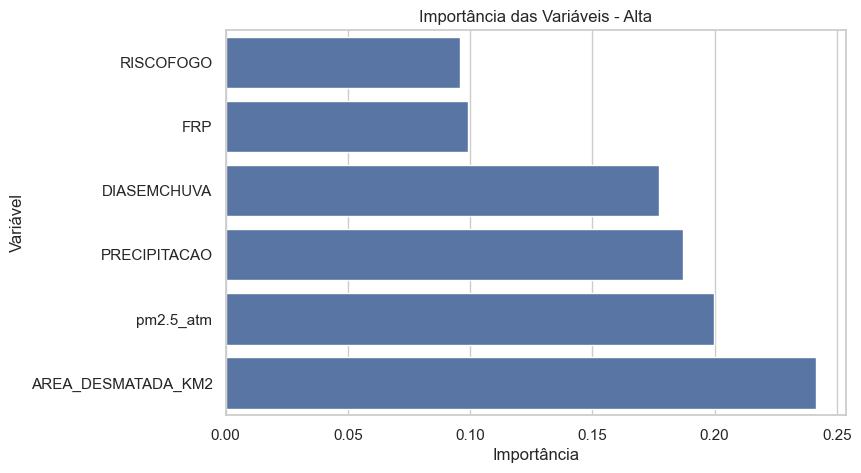

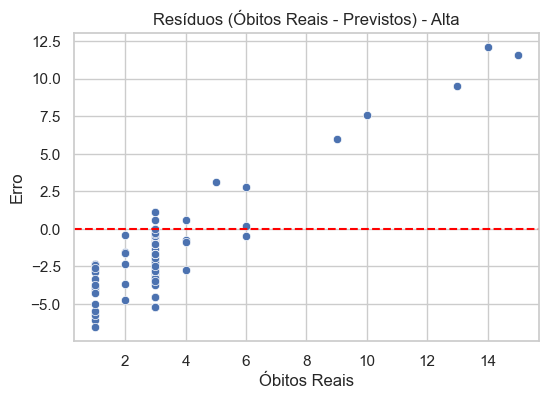

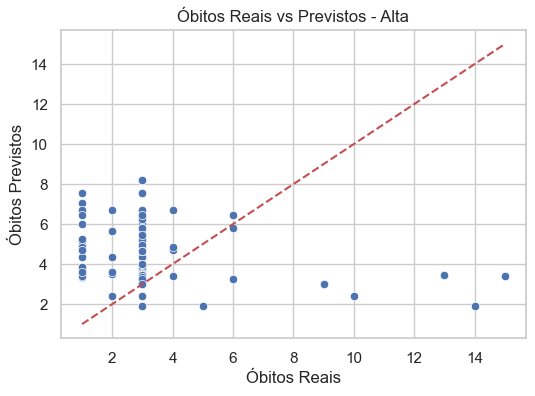

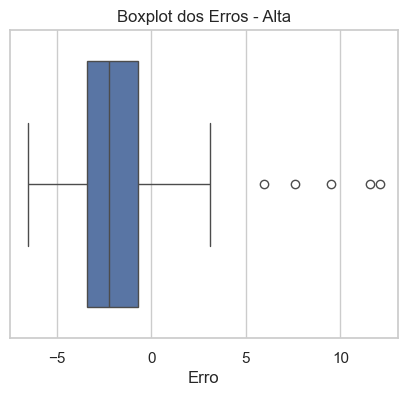

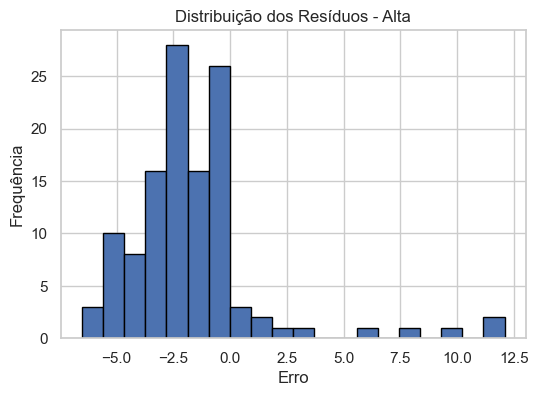


📊 Grupo: Média


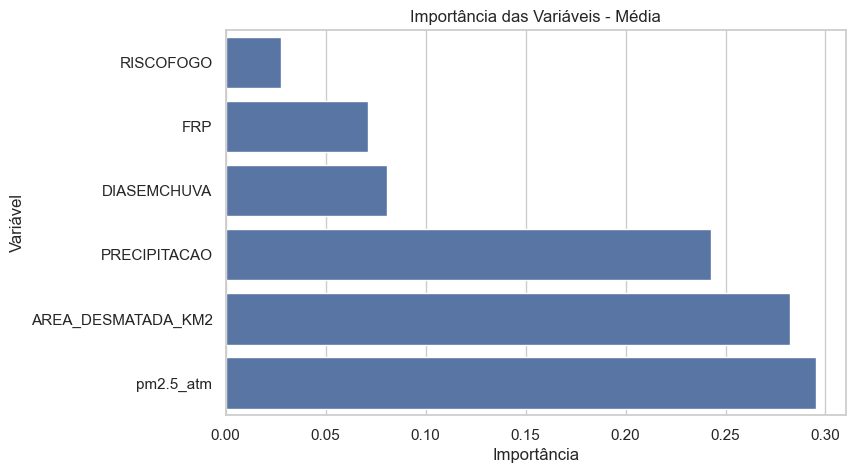

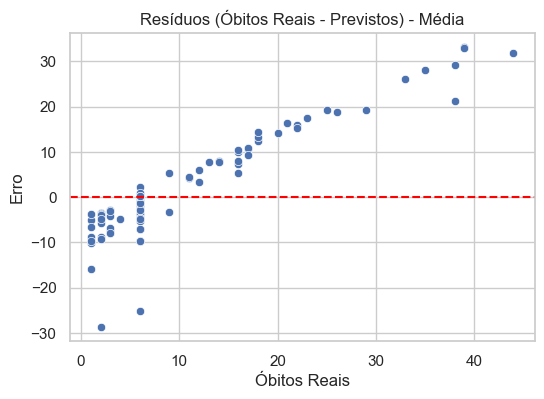

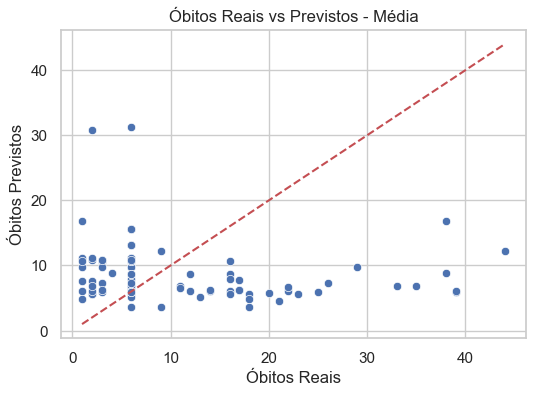

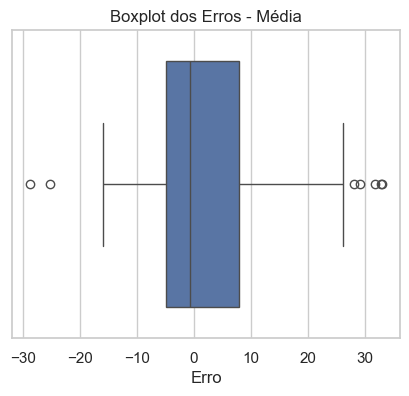

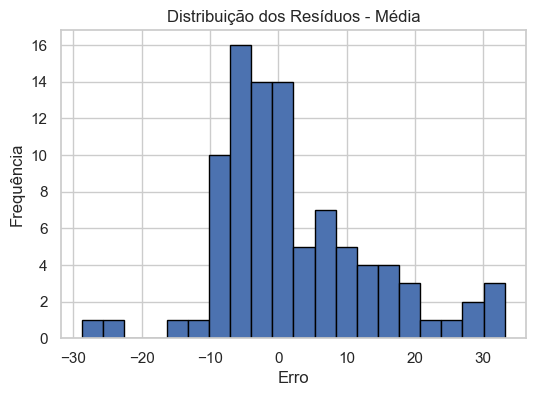


📊 Grupo: Baixa


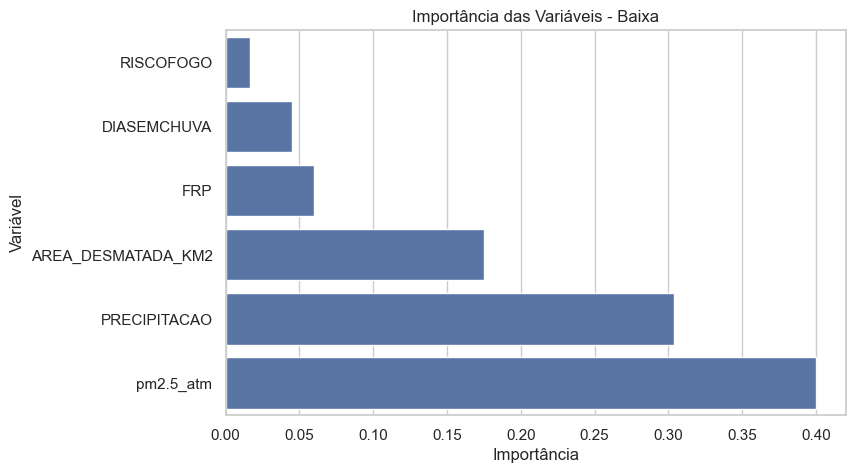

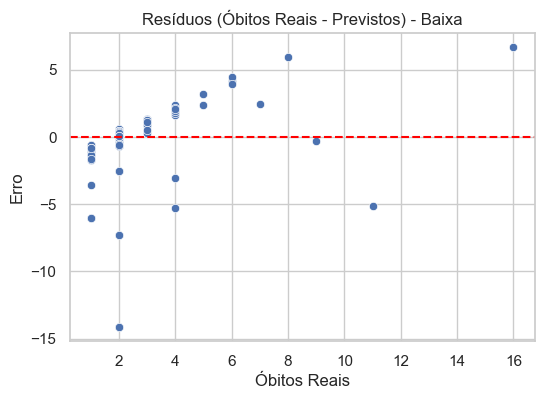

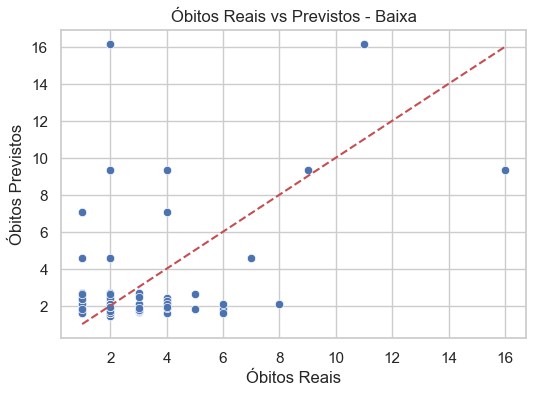

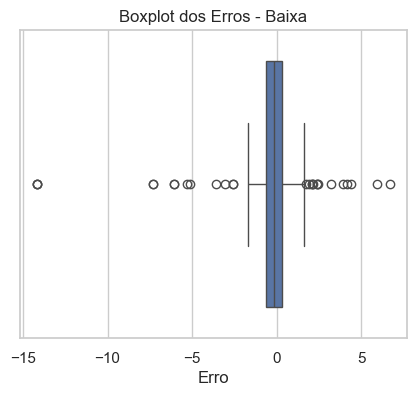

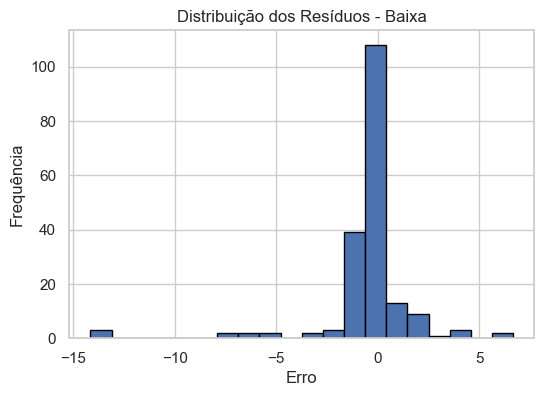


📊 Grupo: Todas


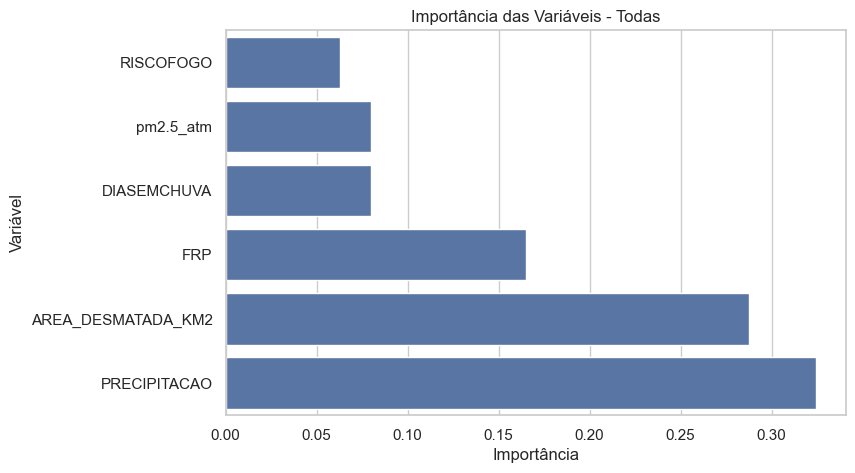

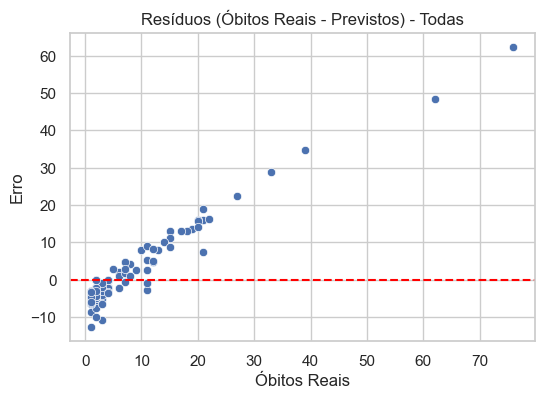

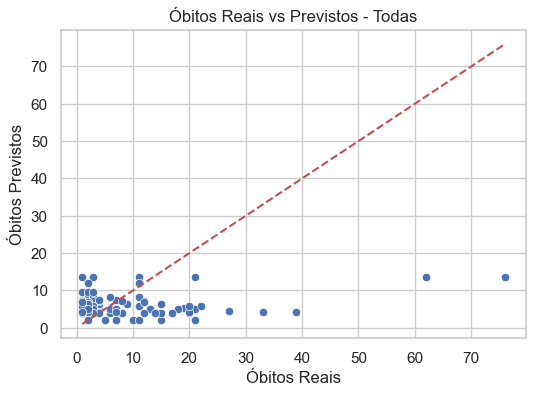

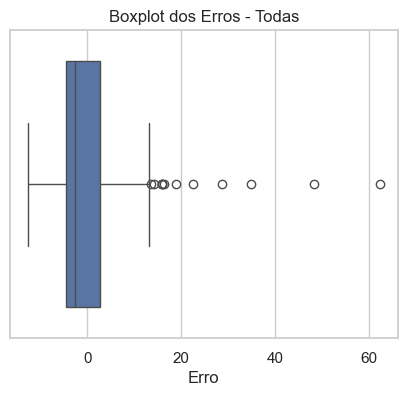

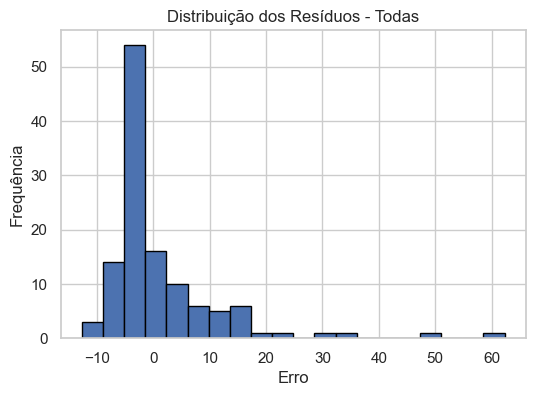

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

for grupo, caminho in caminhos.items():
    print(f"\n📊 Grupo: {grupo}")
    df = pd.read_csv(caminho)

    df[target] = df[target].replace("-", np.nan)
    for col in features + [target]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    df = df[features + [target]].copy()
    for col in features + [target]:
        df[col] = df[col].fillna(df[col].median())

    scaler = StandardScaler()
    df[features] = scaler.fit_transform(df[features])

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    modelo = RandomForestRegressor(random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    residuos = y_test - y_pred

    # Importância das variáveis
    importancias = modelo.feature_importances_
    importancias_df = pd.DataFrame({"Variável": features, "Importância": importancias})
    importancias_df = importancias_df.sort_values("Importância", ascending=True)

    plt.figure(figsize=(8, 5))
    sns.barplot(x="Importância", y="Variável", data=importancias_df)
    plt.title(f"Importância das Variáveis - {grupo}")
    plt.show()

    # Resíduos
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Resíduos (Óbitos Reais - Previstos) - {grupo}")
    plt.xlabel("Óbitos Reais")
    plt.ylabel("Erro")
    plt.show()

    # Real vs Previsto
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"Óbitos Reais vs Previstos - {grupo}")
    plt.xlabel("Óbitos Reais")
    plt.ylabel("Óbitos Previstos")
    plt.show()

    # Boxplot dos erros
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=residuos)
    plt.title(f"Boxplot dos Erros - {grupo}")
    plt.xlabel("Erro")
    plt.show()

    # Histograma dos erros
    plt.figure(figsize=(6, 4))
    plt.hist(residuos, bins=20, edgecolor='black')
    plt.title(f"Distribuição dos Resíduos - {grupo}")
    plt.xlabel("Erro")
    plt.ylabel("Frequência")
    plt.show()



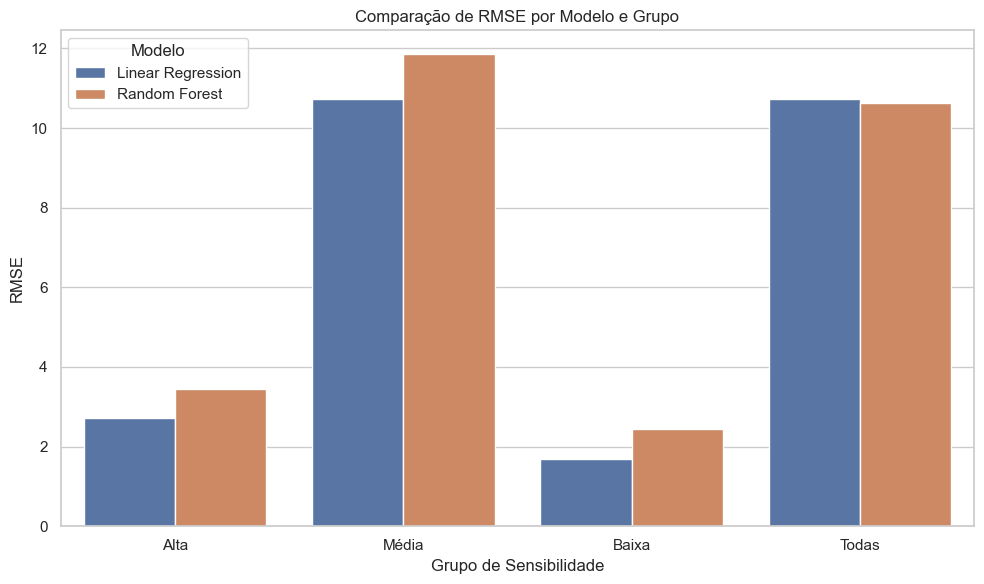

In [22]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados, x="Grupo", y="RMSE", hue="Modelo")
plt.title("Comparação de RMSE por Modelo e Grupo")
plt.ylabel("RMSE")
plt.xlabel("Grupo de Sensibilidade")
plt.tight_layout()
plt.show()
